# Superstore Sales Workflow Tutorial

This notebook walks through cleaning the Superstore dataset, designing a relational structure, creating an SQLite database, and running example SQL queries and visualizations.

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker


## 1️) Load and Inspect the Dataset

In [2]:
# reading error codes + research is how you can learn if there is different encoding, as seen below
df = pd.read_csv('../data/Superstore.csv', encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)
df.dtypes


Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [4]:
df[['Order Date', 'Ship Date']].head()

,Order Date,Ship Date
0,2013-11-09,2013-11-12
1,2013-11-09,2013-11-12
2,2013-06-13,2013-06-17
3,2012-10-11,2012-10-18
4,2012-10-11,2012-10-18


### Double check some datatypes, and for nulls and duplicates:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

This data is incredibly clean - we can see there are no null values and no duplicates. However, there are some dates that could be saved in a better format.

## 2) Data Cleaning

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

In [9]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [10]:
df.Segment.unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [11]:
df.rename(columns={"Segment":"customer_category"}, inplace=True)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,customer_category,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


With real data, it is very likely more cleaning and wrangling would be required. 

In [12]:
customers_df = df[['Customer ID', 'Customer Name', 'customer_category', 'Country']].drop_duplicates()
orders_with_customers = df.merge(customers_df, on='Customer ID', how='left')


## 3) Build Relational Tables

In [13]:
conn = sqlite3.connect('../data/superstore.db')

customers_df = df[['Customer ID','Customer Name','customer_category','City','State','Region','Postal Code']].drop_duplicates().rename(columns={
   'Customer ID': 'customer_id',
    'Customer Name': 'customer_name',
    'City': 'city',
    'State': 'state',
    'Region': 'region',
    'Postal Code': 'postal_code'
    
})

products_df = df[['Product ID','Category','Sub-Category','Product Name']].drop_duplicates().rename(columns={
    'Product ID':'product_id',
    'Category':'category',
    'Sub-Category':'subcategory',
    'Product Name':'product_name'
})

orders_df = df[['Order ID','Order Date','Ship Date','Ship Mode','Customer ID']].drop_duplicates().rename(columns={
    'Order ID':'order_id',
    'Order Date':'order_date',
    'Ship Date':'ship_date',
    'Ship Mode':'ship_mode',
    'Customer ID':'customer_id'
})

order_details_df = df[['Order ID','Product ID','Sales','Quantity','Discount','Profit']].rename(columns={
    'Order ID':'order_id',
    'Product ID':'product_id'
})

customers_df.to_sql('customers', conn, index=False, if_exists='replace')
products_df.to_sql('products', conn, index=False, if_exists='replace')
orders_df.to_sql('orders', conn, index=False, if_exists='replace')
order_details_df.to_sql('order_details', conn, index=False, if_exists='replace')
conn.commit()

## 4) Make Some Queries!

### Which customer segments bring in the most revenue and profit?

In [14]:
query1 = """ SELECT 
    c.customer_category,
    ROUND(SUM(od.sales), 2) AS total_sales,
    ROUND(SUM(od.profit), 2) AS total_profit
FROM order_details od
JOIN orders o ON od.order_id = o.order_id
JOIN customers c ON o.customer_id = c.customer_id
GROUP BY c.customer_category
ORDER BY total_sales DESC;
"""
result1 = pd.read_sql(query1, conn)
result1

,customer_category,total_sales,total_profit
0,Consumer,8380282.43,973085.86
1,Corporate,5044899.83,660287.69
2,Home Office,2964459.36,434344.01


### What are the top 10 customers by total sales?

In [15]:
query2 = """
SELECT * FROM orders
LIMIT 10

"""
result2 = pd.read_sql(query2, conn)
result2

,order_id,order_date,ship_date,ship_mode,customer_id
0,CA-2013-152156,2013-11-09 00:00:00,2013-11-12 00:00:00,Second Class,CG-12520
1,CA-2013-138688,2013-06-13 00:00:00,2013-06-17 00:00:00,Second Class,DV-13045
2,US-2012-108966,2012-10-11 00:00:00,2012-10-18 00:00:00,Standard Class,SO-20335
3,CA-2011-115812,2011-06-09 00:00:00,2011-06-14 00:00:00,Standard Class,BH-11710
4,CA-2014-114412,2014-04-16 00:00:00,2014-04-21 00:00:00,Standard Class,AA-10480
5,CA-2013-161389,2013-12-06 00:00:00,2013-12-11 00:00:00,Standard Class,IM-15070
6,US-2012-118983,2012-11-22 00:00:00,2012-11-26 00:00:00,Standard Class,HP-14815
7,CA-2011-105893,2011-11-11 00:00:00,2011-11-18 00:00:00,Standard Class,PK-19075
8,CA-2011-167164,2011-05-13 00:00:00,2011-05-15 00:00:00,Second Class,AG-10270
9,CA-2011-143336,2011-08-27 00:00:00,2011-09-01 00:00:00,Second Class,ZD-21925


### Which product categories and subcategories are the most profitable overall?

In [16]:
query3 = """ 
SELECT 
    p.category,
    p.subcategory,
    ROUND(SUM(od.sales), 2) AS total_sales,
    ROUND(SUM(od.profit), 2) AS total_profit
FROM products p
JOIN order_details od ON p.product_id = od.product_id
GROUP BY p.category, p.subcategory
ORDER BY total_sales DESC;

"""
result3 = pd.read_sql(query3, conn)
result3

,category,subcategory,total_sales,total_profit
0,Technology,Phones,356702.35,46936.19
1,Furniture,Chairs,330891.13,26707.65
2,Office Supplies,Storage,224958.56,21408.70
3,Office Supplies,Binders,211231.72,30373.20
4,Furniture,Tables,206965.53,-17725.48
5,Technology,Machines,194442.87,2502.64
6,Technology,Accessories,192960.03,48359.05
7,Technology,Copiers,149528.03,55617.82
8,Furniture,Bookcases,127801.64,-3452.87
9,Office Supplies,Appliances,109543.01,18514.49


### What is the average discount given per category?

In [17]:
query4 = """ 
SELECT 
    p.category,
    ROUND(AVG(od.discount), 2) AS avg_discount
FROM order_details od
JOIN products p ON od.product_id = p.product_id
GROUP BY p.category
ORDER BY avg_discount DESC

"""
result4 = pd.read_sql(query4, conn)
result4

,category,avg_discount
0,Furniture,0.17
1,Office Supplies,0.16
2,Technology,0.13


### Which states or regions contribute the most to total sales?

In [18]:
query5 = """ 
SELECT 
    c.state, 
    c.region, 
    ROUND(SUM(od.sales), 2) AS total_sales
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
JOIN order_details od ON o.order_id = od.order_id
GROUP BY c.state, c.region
ORDER BY total_sales DESC


"""
result5 = pd.read_sql(query5, conn)
result5

,state,region,total_sales
0,California,West,3314837.69
1,New York,East,1859365.37
2,Texas,Central,1547925.76
3,Pennsylvania,East,886105.68
4,Washington,West,862298.69
5,Illinois,Central,843352.76
6,Ohio,East,707747.69
7,Florida,South,635637.78
8,North Carolina,South,437938.43
9,Michigan,Central,432428.02


### How many orders were shipped late (where Ship Date > Order Date + 3 days)?

In [19]:
query6 = """ 
SELECT 
    o.order_id,
    o.order_date,
    o.ship_date
FROM orders o
WHERE DATE(o.ship_date) > DATE(o.order_date, '+3 days')

"""
result6 = pd.read_sql(query6, conn)
result6

,order_id,order_date,ship_date
0,CA-2013-138688,2013-06-13 00:00:00,2013-06-17 00:00:00
1,US-2012-108966,2012-10-11 00:00:00,2012-10-18 00:00:00
2,CA-2011-115812,2011-06-09 00:00:00,2011-06-14 00:00:00
3,CA-2014-114412,2014-04-16 00:00:00,2014-04-21 00:00:00
4,CA-2013-161389,2013-12-06 00:00:00,2013-12-11 00:00:00
...,...,...,...
3386,CA-2012-100251,2012-05-17 00:00:00,2012-05-23 00:00:00
3387,CA-2013-125794,2013-09-30 00:00:00,2013-10-04 00:00:00
3388,CA-2014-163629,2014-11-18 00:00:00,2014-11-22 00:00:00
3389,CA-2014-121258,2014-02-27 00:00:00,2014-03-04 00:00:00


### Which month or year had the highest total sales?

In [32]:
query7 = """ 
SELECT 
    strftime('%Y-%m', o.order_date) AS order_month,
    ROUND(SUM(od.sales), 2) AS total_sales,
    ROUND(SUM(od.profit), 2) AS total_profit
FROM orders o
JOIN order_details od ON o.order_id = od.order_id
GROUP BY order_month    

"""
result7 = pd.read_sql(query7, conn)
result7

,order_month,total_sales,total_profit
0,2011-01,13946.23,2446.77
1,2011-02,4810.56,865.73
2,2011-03,55691.01,498.73
3,2011-04,28295.35,3488.84
4,2011-05,23648.29,2738.71
5,2011-06,34595.13,4976.52
6,2011-07,33946.39,-841.48
7,2011-08,27909.47,5318.10
8,2011-09,81777.35,8328.10
9,2011-10,31453.39,3448.26


### What are the most frequently ordered products?

In [31]:
query8 = """
SELECT 
    p.subcategory,
    ROUND(SUM(od.profit) / SUM(od.sales) * 100, 2) AS profit_margin_percentage
FROM products p
JOIN order_details od ON p.product_id = od.product_id
GROUP BY p.subcategory

"""
result8 = pd.read_sql(query8, conn)
result8

,subcategory,profit_margin_percentage
0,Accessories,25.06
1,Appliances,16.90
2,Art,24.09
3,Binders,14.38
4,Bookcases,-2.70
5,Chairs,8.07
6,Copiers,37.20
7,Envelopes,42.27
8,Fasteners,31.40
9,Furnishings,14.77


### Which customers placed more than 5 orders total?

In [30]:
query9 = """ 
SELECT 
    c.customer_id,
    c.customer_name,
    COUNT(o.order_id) AS total_orders,
    ROUND(SUM(od.sales), 2) AS total_sales,
    ROUND(SUM(od.profit), 2) AS total_profit
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
JOIN order_details od ON o.order_id = od.order_id
GROUP BY c.customer_id, c.customer_name
HAVING total_orders > 5
ORDER BY total_sales DESC
"""
result9 = pd.read_sql(query9, conn)
result9

,customer_id,customer_name,total_orders,total_sales,total_profit
0,KL-16645,Ken Lonsdale,319,155927.52,8875.40
1,SE-20110,Sanjit Engle,209,134303.82,29157.45
2,CL-12565,Clay Ludtke,336,130566.55,23205.40
3,AB-10105,Adrian Barton,180,130262.14,49003.25
4,SC-20095,Sanjit Chand,198,127281.01,51816.71
...,...,...,...,...,...
771,HH-15010,Hilary Holden,6,218.67,86.73
772,LB-16735,Larry Blacks,9,150.56,55.95
773,SG-20890,Susan Gilcrest,15,143.84,-11.12
774,AS-10135,Adrian Shami,6,117.64,43.70


### What’s the profit margin (profit ÷ sales) by category or segment?

In [29]:
query10 = """ 
SELECT
    p.category,
    p.subcategory,
    ROUND(SUM(od.sales), 2) AS total_sales,
    ROUND(SUM(od.profit), 2) AS total_profit,
    ROUND(SUM(od.profit) * 100.0 / SUM(od.sales), 2) AS profit_margin_percentage,
    ROUND(AVG(od.discount), 2) AS avg_discount
FROM products p
JOIN order_details od ON p.product_id = od.product_id
GROUP BY p.category, p.subcategory
HAVING total_sales > 10000
ORDER BY profit_margin_percentage DESC



"""
result10 = pd.read_sql(query10, conn)
result10

,category,subcategory,total_sales,total_profit,profit_margin_percentage,avg_discount
0,Office Supplies,Labels,12486.31,5546.25,44.42,0.07
1,Office Supplies,Paper,85155.02,36994.53,43.44,0.08
2,Office Supplies,Envelopes,16476.40,6964.18,42.27,0.08
3,Technology,Copiers,149528.03,55617.82,37.20,0.16
4,Technology,Accessories,192960.03,48359.05,25.06,0.08
5,Office Supplies,Art,27199.74,6551.56,24.09,0.07
6,Office Supplies,Appliances,109543.01,18514.49,16.90,0.16
7,Furniture,Furnishings,98626.35,14569.59,14.77,0.14
8,Office Supplies,Binders,211231.72,30373.20,14.38,0.37
9,Technology,Phones,356702.35,46936.19,13.16,0.16


### 5) Visualize it!

From your ten results, select at least 4 to utilize in a meaningful visualization. 

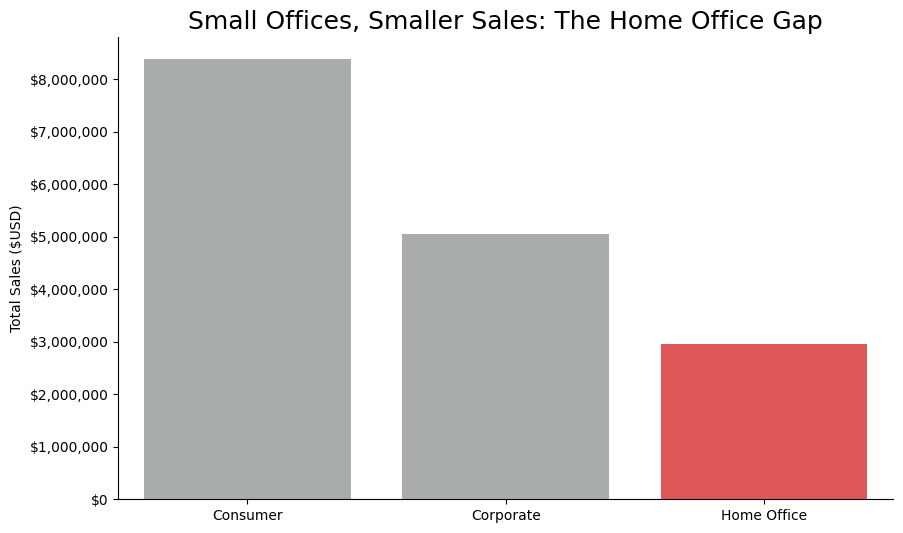

In [28]:
# example using result1
plt.figure(figsize=(10,6))
colors = ["#a7adaa", "#a7adaa", "#f74141" ]
sns.barplot(result1, x='customer_category', y='total_sales', palette=colors, hue='customer_category', legend=False)
plt.title('Small Offices, Smaller Sales: The Home Office Gap',fontsize=18)
plt.xlabel(None)
plt.ylabel('Total Sales ($USD)')

#for those wondering how to get rid of scientific notation! Set style to plain:
plt.ticklabel_format(style='plain', axis='y')

#mticker is a great library for helping tick mark formatting, such as adding commas and dollar signs in this case
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

#using the seaborn library, despining is way easier!
sns.despine()
plt.show()


C:\Users\jblev\AppData\Local\Temp\ipykernel_21696\1134620039.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


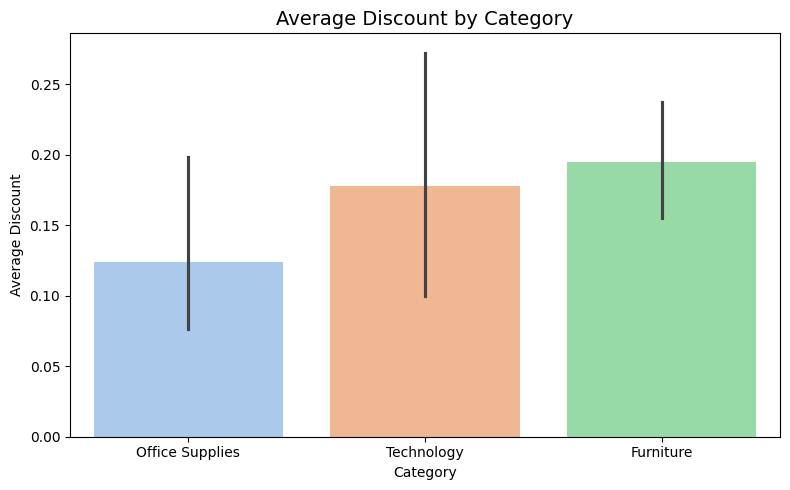

In [ ]:
# visualization three code here
plt.figure(figsize=(8, 5))
sns.barplot(
    data=result10, 
    x='category',
    y='avg_discount',
    palette='pastel'
)

plt.title('Average Discount by Category', fontsize=14)
plt.xlabel('Category')
plt.ylabel('Average Discount')
plt.tight_layout()
plt.show()

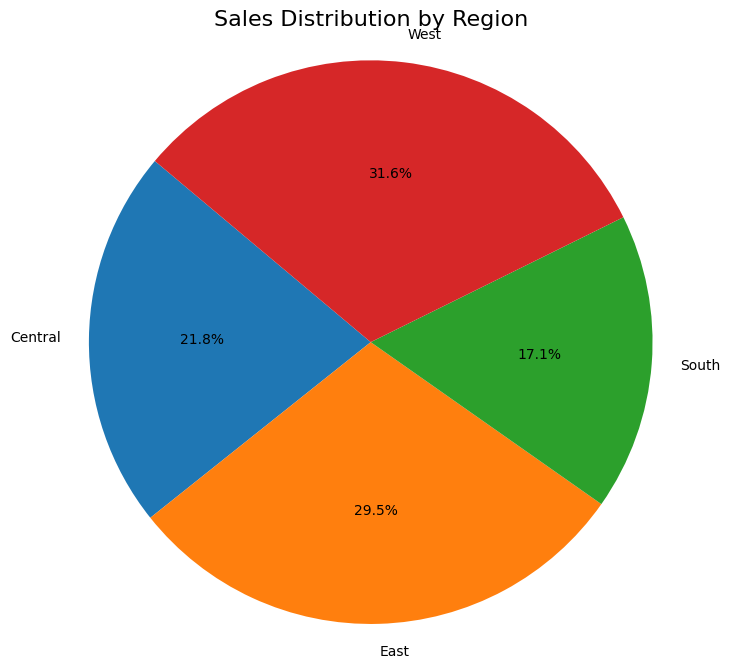

In [41]:
# visualization three code here
region_sales = df.groupby('Region')['Sales'].sum()

# Pie plot
plt.figure(figsize=(8, 8))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=140)
plt.title("Sales Distribution by Region", fontsize=16)
plt.axis('equal')  # Make it a circle
plt.show()

C:\Users\jblev\AppData\Local\Temp\ipykernel_11464\3148942900.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\jblev\AppData\Local\Temp\ipykernel_11464\3148942900.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


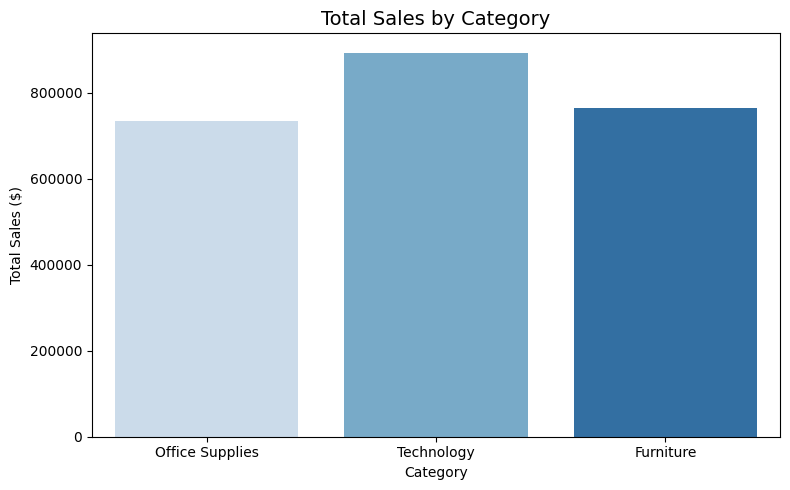

In [ ]:
# visualization three code here

plt.figure(figsize=(8, 5))
sns.barplot(
    data=result10,
    x='category',
    y='total_sales',
    estimator=sum,
    ci=None,
    palette='Blues'
)
plt.title('Total Sales by Category', fontsize=14)
plt.xlabel('Category')
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.show()

C:\Users\jblev\AppData\Local\Temp\ipykernel_11464\137311013.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


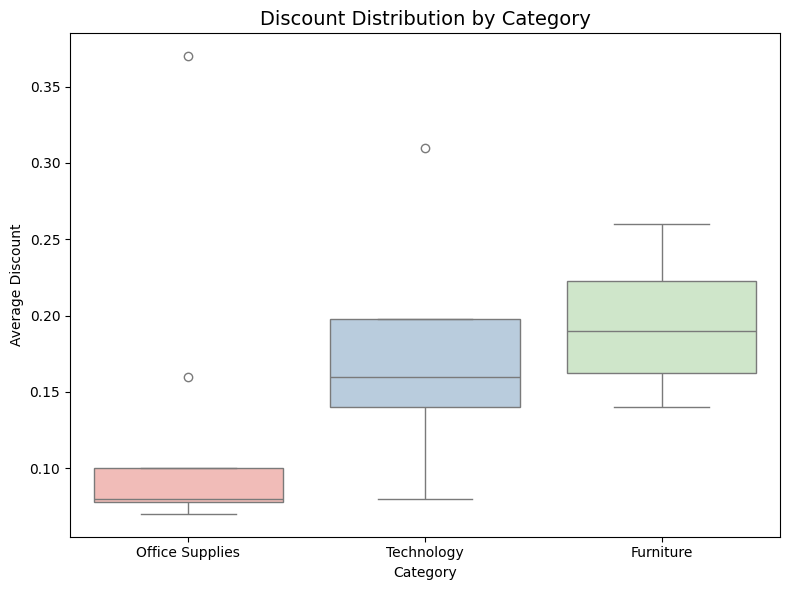

In [ ]:
# visualization three code here


plt.figure(figsize=(8, 6))
sns.boxplot(
    data=result10,
    x='category',
    y='avg_discount',
    palette='Pastel1'
)
plt.title('Discount Distribution by Category', fontsize=14)
plt.xlabel('Category')
plt.ylabel('Average Discount')
plt.tight_layout()
plt.show()

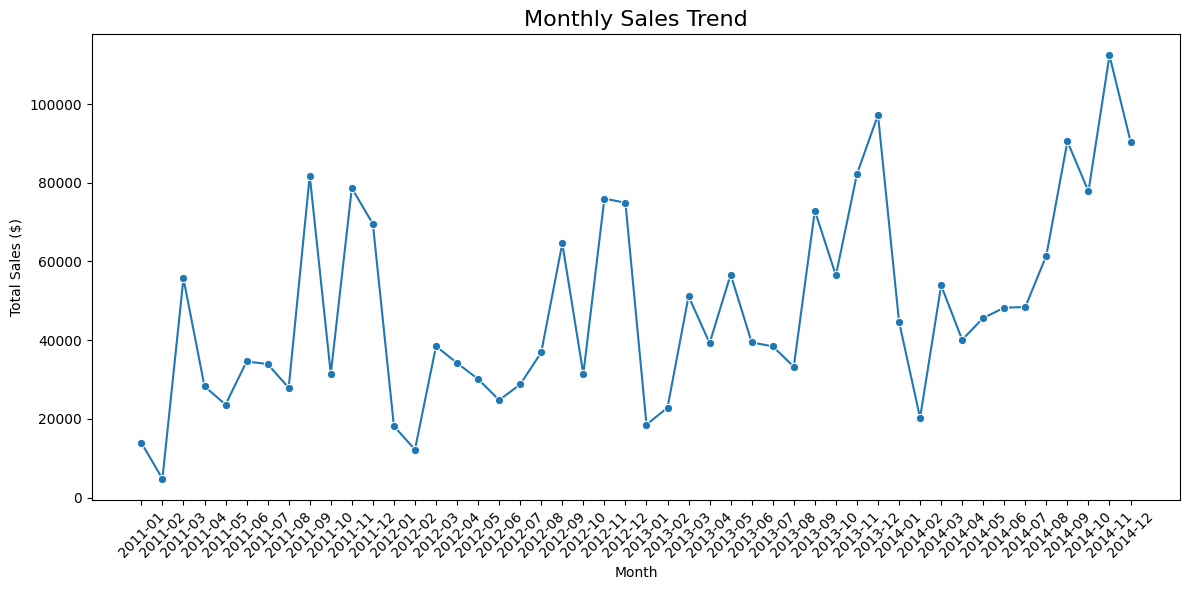

In [ ]:
# Group sales by month
df['Order Date'] = pd.to_datetime(df['Order Date']) 
df['Month'] = df['Order Date'].dt.to_period('M').astype(str)

monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', marker='o')
plt.title("Monthly Sales Trend", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()